In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=[0], low_memory = False)

In [ ]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

In [ ]:
df.head()

In [ ]:
df.columns

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [3]:
#changing number to state names to help with the graphs
df['_STATE'].replace([9],'Connecticut',inplace=True)
df['_STATE'].replace([34], 'New Jersey', inplace=True)
df['_STATE'].replace([36], 'New York', inplace=True)



Now check to see how large our subset df.

In [ ]:
# setting index to state
# df = df.set_index('_STATE')
# df.head()

In [ ]:
df.head()

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [4]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [5]:
#your code here
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [6]:
# changing 88 to 0 becasue 88= sick for no days for past month
df['PHYSHLTH'].replace(88, 0, inplace=True)

In [7]:
# replacing all 99 and 77 to None to find the mean of each state, then will replace 77 and 99 with the mean
df['PHYSHLTH'].replace([77,99], np.nan, inplace=True)

In [8]:
df['PHYSHLTH'].value_counts()

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
20.0      402
14.0      326
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [9]:
df['_STATE']

49938     Connecticut
49939     Connecticut
49940     Connecticut
49941     Connecticut
49942     Connecticut
             ...     
303774       New York
303775       New York
303776       New York
303777       New York
303778       New York
Name: _STATE, Length: 34545, dtype: object

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

In [10]:
# descriptive statistics
df.groupby('_STATE')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
Connecticut,10413.0,3.688562,8.103732,0.0,0.0,0.0,2.0,30.0
New Jersey,11458.0,4.380957,8.923776,0.0,0.0,0.0,3.0,30.0
New York,11876.0,4.148030,8.445330,0.0,0.0,0.0,3.0,30.0


In [ ]:
# graphic showing those descriptive stats
# df.groupby('_STATE')['PHYSHLTH'].plot(kind='box')
boxplot = df.boxplot(column=['_STATE'])

#  df = pd.DataFrame(np.random.randn(10,4),
# ...                   columns=['Col1', 'Col2', 'Col3', 'Col4'])
# >>> boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

Text(0.5, 0, 'Days Sick for the past month')

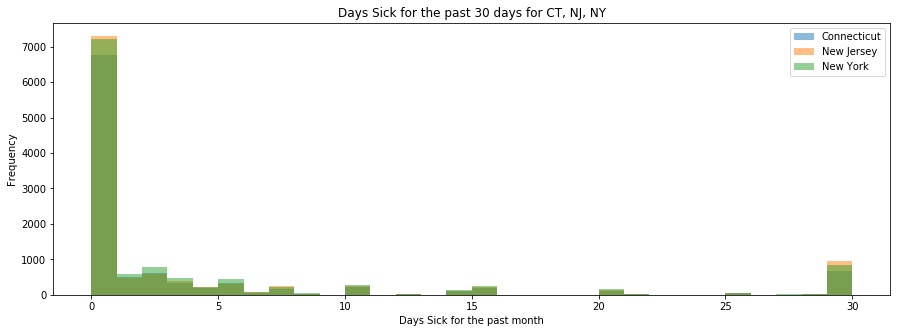

In [11]:
# graphic showing the distribution of data
df.groupby('_STATE')['PHYSHLTH'].plot(kind='hist', bins = 30, alpha = 0.5, figsize = (15,5))
plt.title('Days Sick for the past 30 days for CT, NJ, NY')
plt.legend()
plt.xlabel('Days Sick for the past month')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [12]:
# code to calculate the average number of sick days by state
df.groupby('_STATE')['PHYSHLTH'].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

Text(0.5, 1.0, 'Average number of sick days in the past 30 days by state')

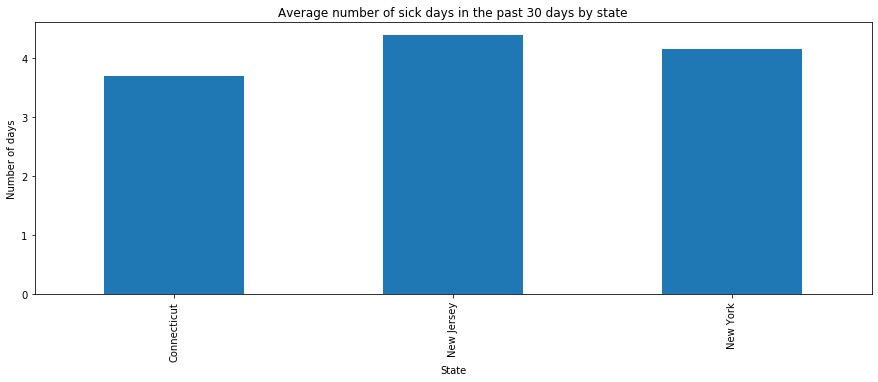

In [13]:
# code to graph those averages using matplotlib
df.groupby('_STATE')['PHYSHLTH'].mean().plot(kind='bar',figsize = (15,5))
plt.xlabel('State')
plt.ylabel('Number of days')
plt.title('Average number of sick days in the past 30 days by state')


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [14]:
# code to create new colum for chronically sick
chronic_df = df.loc[:, 'CVDINFR4':'DIABETE3']
chronic_df

,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3
49938,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0
49939,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0
49940,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0
49941,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0
49942,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
303774,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0
303775,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0
303776,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,3.0
303777,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,3.0


In [15]:
# left all yes's to a value of one and every other answer to 0
chronic_df.replace(range(2,10), 0, inplace=True)


In [16]:
# every yes to a chronic disease question was added up to pt and put in chronic index column, the more chronic diseases
# the higher the value
chronic_df['Chronic Index'] = chronic_df.sum(axis=1)

In [17]:
chronic_df

,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,Chronic Index
49938,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
49939,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49940,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49941,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49942,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
303775,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303776,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303777,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [18]:
# merged new column to og df
df['chronic sick'] = chronic_df['Chronic Index']

In [19]:
df.groupby('chronic sick')['PHYSHLTH'].mean()

chronic sick
0.0      1.591080
1.0      3.549207
2.0      5.348566
3.0      7.348307
4.0      9.921528
5.0     12.555556
6.0     15.381215
7.0     16.118421
8.0     19.562500
9.0     18.233333
10.0    18.111111
Name: PHYSHLTH, dtype: float64

Text(0, 0.5, 'Avg days sick in paster 30 days')

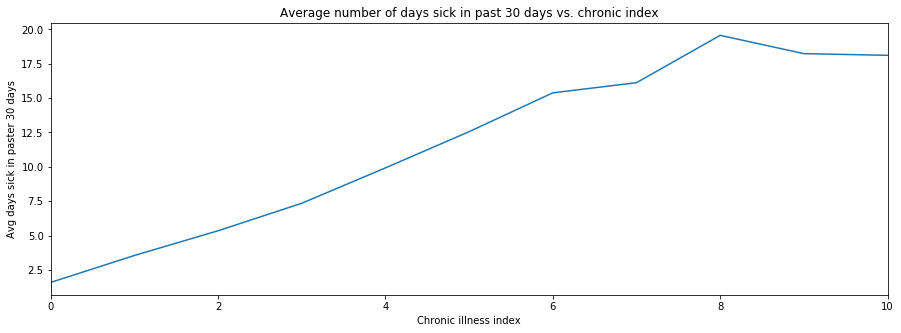

In [20]:
# chronic index vs physhlth
df.groupby('chronic sick')['PHYSHLTH'].mean().plot(kind='line',figsize = (15,5))
plt.title('Average number of days sick in past 30 days vs. chronic index')
plt.xlabel('Chronic illness index')
plt.ylabel('Avg days sick in paster 30 days')

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [21]:
# code to calculate averages per state
result = df.groupby(['_STATE','chronic sick'])['PHYSHLTH'].mean().reset_index()

In [22]:
ct = result[result['_STATE'] == 'Connecticut']
ny = result[result['_STATE'] == 'New York']
nj = result[result['_STATE'] == 'New Jersey']

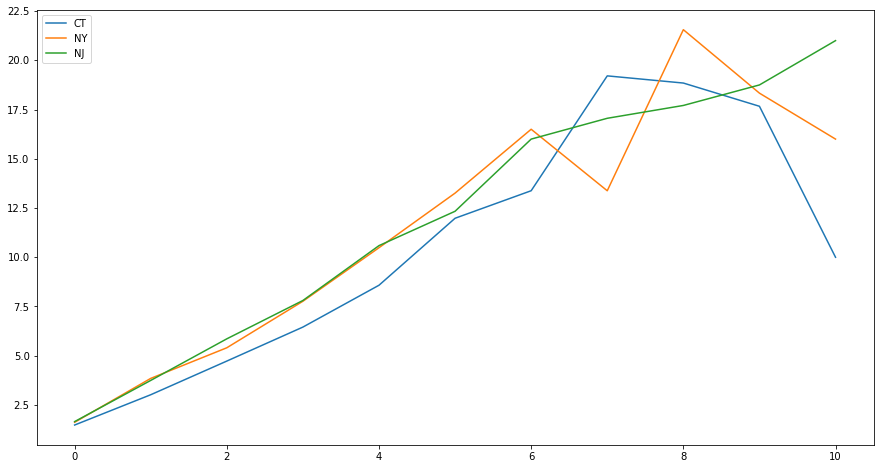

In [23]:
# df.groupby(['_STATE','chronic sick'])['PHYSHLTH'].mean().plot(kind='line',figsize = (15,5))
plt.figure(figsize =(15,8))
plt.plot(ct['chronic sick'], ct['PHYSHLTH'], label = 'CT')
plt.plot(ny['chronic sick'], ny['PHYSHLTH'], label = 'NY')
plt.plot(nj['chronic sick'], nj['PHYSHLTH'], label = 'NJ')
plt.legend()


In [ ]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [24]:
df.loc[:, 'SMOKDAY2'].isna().sum()

20762

In [25]:
df['SMOKDAY2'].replace([7,9], np.nan, inplace=True)
df['SMOKDAY2'].value_counts()

3.0    9703
1.0    2676
2.0    1371
Name: SMOKDAY2, dtype: int64

In [26]:
# change integers to strings to descibe better
df['SMOKDAY2'].replace(1, 'Every day', inplace = True)
df['SMOKDAY2'].replace(2, 'Some days', inplace = True)
df['SMOKDAY2'].replace(3, 'Not at all', inplace = True)

In [27]:
df.groupby('SMOKDAY2')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
SMOKDAY2,,,,,,,,
Every day,2611.0,6.653007,10.757402,0.0,0.0,0.0,10.0,30.0
Not at all,9494.0,4.581841,8.976577,0.0,0.0,0.0,4.0,30.0
Some days,1336.0,6.295659,10.359176,0.0,0.0,0.0,7.0,30.0


Text(0.5, 0, 'Nubmer of days sick in the past 30 days')

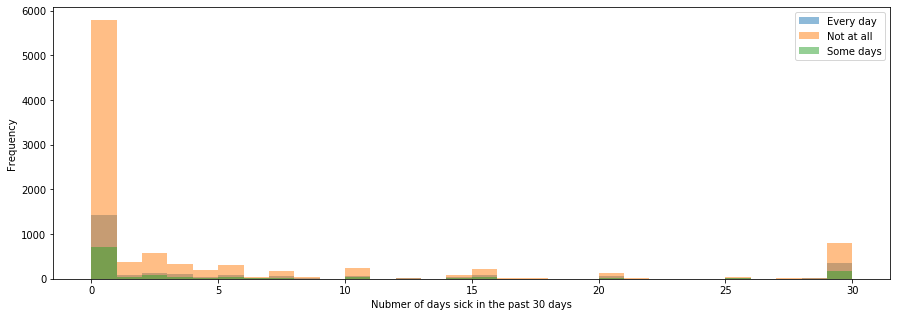

In [28]:
df.groupby('SMOKDAY2')['PHYSHLTH'].plot(kind='hist', bins = 30, alpha = 0.5, figsize = (15,5))
plt.legend()
plt.xlabel('Nubmer of days sick in the past 30 days')

In [29]:
smoke_result = df.groupby(['_STATE','SMOKDAY2'])['PHYSHLTH'].mean().reset_index()

ct_smokers = smoke_result[smoke_result['_STATE'] == 'Connecticut']
ny_smokers = smoke_result[smoke_result['_STATE'] == 'New York']
nj_smokers = smoke_result[smoke_result['_STATE'] == 'New Jersey']

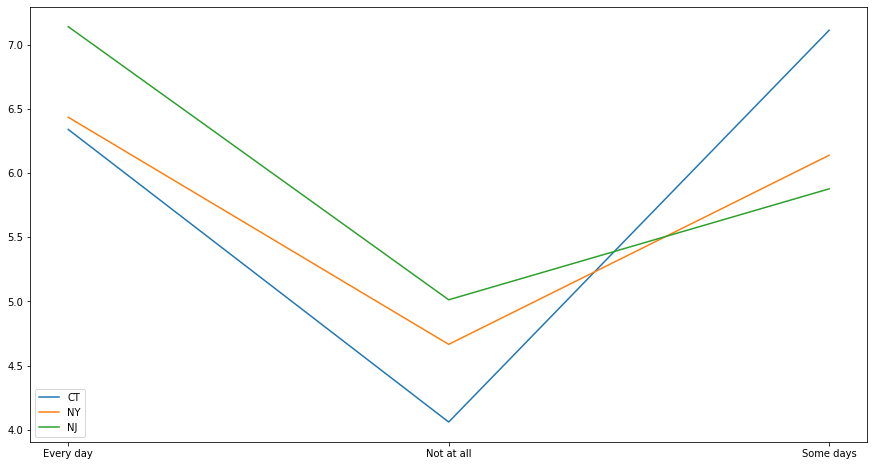

In [30]:
plt.figure(figsize =(15,8))
plt.plot(ct_smokers['SMOKDAY2'], ct_smokers['PHYSHLTH'], label = 'CT')
plt.plot(ny_smokers['SMOKDAY2'], ny_smokers['PHYSHLTH'], label = 'NY')
plt.plot(nj_smokers['SMOKDAY2'], nj_smokers['PHYSHLTH'], label = 'NJ')
plt.legend()


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [32]:
df['ALCDAY5'].replace(888, 0, inplace = True)

# df['ALCDAY5'] range(101-107).value_counts()


In [33]:
#make a new colum for drinkper day vs month
df.loc[df['ALCDAY5']<108,'drinks_per_week'] = df['ALCDAY5']
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chronic sick,drinks_per_week
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,101.0
49939,Connecticut,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,0.0,NaN
49940,Connecticut,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,0.0,0.0
49941,Connecticut,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,0.0,103.0
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,0.0,101.0


In [34]:
df['ALCDAY5'].replace([777, 999], np.nan, inplace = True)


In [35]:
df.loc[df['ALCDAY5']>200,'drinks_per_month'] = df['ALCDAY5']
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chronic sick,drinks_per_week,drinks_per_month
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,4.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,101.0,NaN
49939,Connecticut,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,2.0,2.0,NaN,NaN,2.0,0.0,NaN,230.0
49940,Connecticut,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,1.0,NaN,NaN,2.0,0.0,0.0,NaN
49941,Connecticut,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,NaN,NaN,1.0,0.0,103.0,NaN
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,2.0,0.0,101.0,NaN


In [37]:
# can we get the last element of each value and change the value to that?
df('ALCDAY5')[0]

TypeError: 'DataFrame' object is not callable

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  